In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# Шаг 1: Загрузка данных
data = pd.read_csv('data-logistic.csv', header=None)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Добавление фиктивного признака для удобства
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [3]:
# Шаг 3: Реализация градиентного спуска
def sigmoid(z):
    clipped_z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-clipped_z))

def gradient_descent(X, y, k, C, max_iter=10000, eps=1e-5):
    w = np.zeros(X.shape[1])
    for i in range(max_iter):
        z = np.dot(X, w)
        predictions = sigmoid(z)
        gradient = np.dot(X.T, (predictions - y)) / len(y) + C * w
        w -= k * gradient
        if np.linalg.norm(k * gradient) < eps:
            break
    return w

In [4]:
# Шаг 4: Запуск градиентного спуска
w_no_reg = gradient_descent(X, y, k=0.1, C=0)
w_with_reg = gradient_descent(X, y, k=0.1, C=10)

# Вычисление вероятностей с помощью обученных моделей
probabilities_no_reg = sigmoid(np.dot(X, w_no_reg))
probabilities_with_reg = sigmoid(np.dot(X, w_with_reg))

In [5]:
# Шаг 5: Вычисление AUC-ROC
auc_no_reg = roc_auc_score(y, probabilities_no_reg)
auc_with_reg = roc_auc_score(y, probabilities_with_reg)

print(f"AUC-ROC без регуляризации: {auc_no_reg}")
print(f"AUC-ROC с L2-регуляризацией: {auc_with_reg}")

AUC-ROC без регуляризации: 0.9358095238095238
AUC-ROC с L2-регуляризацией: 0.937142857142857


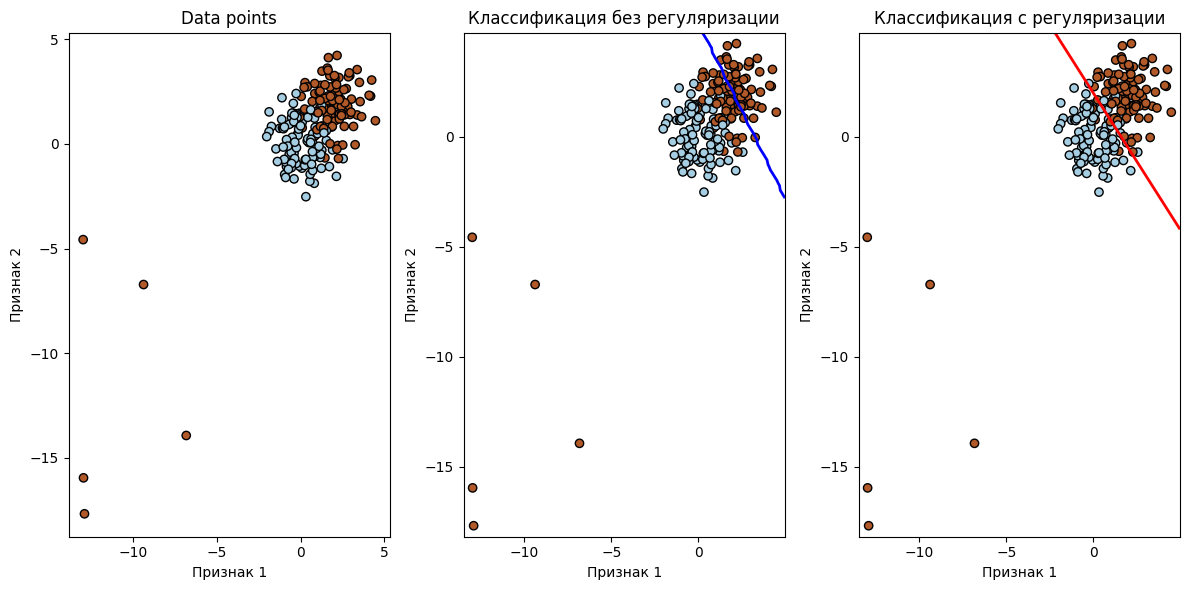

In [14]:
# Шаг 6: Визуализация разделяющих гиперплоскостей
plt.figure(figsize=(12, 6))

# Визуализация данных
plt.subplot(1, 3, 1)
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Data points')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

# Визуализация разделяющей гиперплоскости без регуляризации
plt.subplot(1, 3, 2)
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, edgecolors='k')
xmin, xmax = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
ymin, ymax = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
X_mesh = np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()]
Z_no_reg = sigmoid(X_mesh.dot(w_no_reg)).reshape(xx.shape)
plt.contour(xx, yy, Z_no_reg, levels=[0.5], linewidths=2, colors='blue')
plt.title('Классификация без регуляризации')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

# Визуализация разделяющей гиперплоскости с L2-регуляризацией
plt.subplot(1, 3, 3)
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, edgecolors='k')
Z_with_reg = sigmoid(X_mesh.dot(w_with_reg)).reshape(xx.shape)
plt.contour(xx, yy, Z_with_reg, levels=[0.5], linewidths=2, colors='red')
plt.title('Классификация с регуляризации')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()